In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [3]:
commune = pd.read_excel('commune.xlsx')
commune.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [4]:
quest = pd.read_csv('quest.csv')
quest.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [5]:
quest = quest.drop(columns=['dob','current_employed','formal_sector_job','after_AA',], axis=1)
quest.head()

,Unnamed: 0,gender,commune,created_at,modified_at,department,education_level,university,study_domain,have_computer_home,internet_at_home,hear_AA_1,quest_id
0,0,male,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,ht0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [6]:
enroll = pd.read_csv("enroll.csv")
enroll.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [7]:
enroll = enroll.drop(columns=['user_id','course_name','completed_at','completed','expired'], axis=1)
enroll.head()

,Unnamed: 0,created_at,expiry_date,course_id,percentage_completed,is_free_trial,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,1047613,0.0,True,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,1047613,0.0,True,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,1047613,0.0,True,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,1047613,0.0,True,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,1047613,0.0,True,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [8]:
study_domain = pd.read_csv("study_domain.csv")
study_domain.head()

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [9]:
industry = pd.read_csv("industry.csv")
industry.head()

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item6,Technology (Software/ Internet),905e2608-ce95-11eb-809f-7c67a234f601
2,2,item5,Education,905e2608-ce95-11eb-809f-7c67a234f601
3,3,item3,Consulting,905e2608-ce95-11eb-809f-7c67a234f601
4,4,item7,Energy,905e2608-ce95-11eb-809f-7c67a234f601


In [10]:
ord = pd.read_csv("ord.csv")
ord.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636,0,0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601


In [11]:
technology = pd.read_csv("study_domain.csv")
technology.head()

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [12]:
transaction = pd.read_csv("study_domain.csv")
transaction.head()

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [13]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            148 non-null    int64  
 1   created_at            148 non-null    object 
 2   expiry_date           60 non-null     object 
 3   course_id             148 non-null    int64  
 4   percentage_completed  148 non-null    float64
 5   is_free_trial         148 non-null    bool   
 6   started_at            135 non-null    object 
 7   activated_at          77 non-null     object 
 8   updated_at            148 non-null    object 
 9   quest_id              102 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 10.7+ KB


In [14]:
enroll.nunique()

Unnamed: 0              148
created_at              148
expiry_date              60
course_id                 1
percentage_completed     38
is_free_trial             2
started_at              135
activated_at             77
updated_at              148
quest_id                102
dtype: int64

In [15]:
enroll.isna().sum()

Unnamed: 0               0
created_at               0
expiry_date             88
course_id                0
percentage_completed     0
is_free_trial            0
started_at              13
activated_at            71
updated_at               0
quest_id                46
dtype: int64

In [16]:
enroll.isna

<bound method DataFrame.isna of      Unnamed: 0                created_at               expiry_date  \
0             0  2020-12-12T06:41:29.844Z                       NaN   
1             1  2020-12-13T14:41:17.720Z                       NaN   
2             2  2020-12-15T00:53:06.499Z                       NaN   
3             3  2020-12-18T18:38:55.683Z                       NaN   
4             4  2020-12-21T14:45:06.528Z                       NaN   
..          ...                       ...                       ...   
143         143  2021-03-14T02:16:08.736Z  2071-03-02T02:16:55.000Z   
144         144  2021-03-14T04:20:30.803Z                       NaN   
145         145  2021-03-14T07:34:09.491Z  2071-03-02T07:34:26.000Z   
146         146  2021-03-14T15:34:39.800Z                       NaN   
147         147  2021-03-14T17:34:44.861Z  2071-03-02T17:34:52.000Z   

     course_id  percentage_completed  is_free_trial                started_at  \
0      1047613              0.0000

In [17]:
enroll.shape

(148, 10)

In [18]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               18 non-null     int64  
 1   created_at               18 non-null     object 
 2   user_id                  18 non-null     int64  
 3   product_name             18 non-null     object 
 4   product_id               18 non-null     int64  
 5   amount_dollars           18 non-null     int64  
 6   amount_cents             18 non-null     int64  
 7   subscription             18 non-null     bool   
 8   coupon_code              4 non-null      object 
 9   coupon_id                4 non-null      float64
 10  affiliate_referral_code  0 non-null      float64
 11  status                   18 non-null     object 
 12  quest_id                 14 non-null     object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 1.8+ KB


In [19]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   commune             250 non-null    object
 3   created_at          250 non-null    object
 4   modified_at         250 non-null    object
 5   department          249 non-null    object
 6   education_level     250 non-null    object
 7   university          250 non-null    object
 8   study_domain        250 non-null    object
 9   have_computer_home  250 non-null    object
 10  internet_at_home    250 non-null    object
 11  hear_AA_1           250 non-null    object
 12  quest_id            250 non-null    object
dtypes: int64(1), object(12)
memory usage: 25.5+ KB


In [20]:
study_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  287 non-null    int64 
 1   key         287 non-null    object
 2   values      287 non-null    object
 3   quest_id    287 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


In [21]:
commune.isnull().sum().sort_values(ascending=False)

Commune_en     0
Commune_FR     0
Commune_Id     0
Departement    0
ADM1_PCODE     0
dtype: int64

In [22]:
enroll.isnull().sum().sort_values(ascending=False)

expiry_date             88
activated_at            71
quest_id                46
started_at              13
Unnamed: 0               0
created_at               0
course_id                0
percentage_completed     0
is_free_trial            0
updated_at               0
dtype: int64

In [23]:
ord.isnull().sum().sort_values(ascending=False)

affiliate_referral_code    18
coupon_code                14
coupon_id                  14
quest_id                    4
Unnamed: 0                  0
created_at                  0
user_id                     0
product_name                0
product_id                  0
amount_dollars              0
amount_cents                0
subscription                0
status                      0
dtype: int64

In [24]:
#make a groupeby
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

quest_commune=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
quest_commune.head()

,Unnamed: 0,gender,commune,created_at,modified_at,department,education_level,university,study_domain,have_computer_home,internet_at_home,hear_AA_1,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [25]:
quest_commune_enroll=pd.merge(left=quest_commune, right=enroll, how = 'left',on='quest_id')
quest_commune_enroll.shape

(250, 27)

In [31]:
quest_enroll = pd.merge(left=quest, right= enroll, how = 'left', on= 'quest_id')
quest_enroll.head()

,Unnamed: 0_x,gender,commune,created_at_x,modified_at,department,education_level,university,study_domain,have_computer_home,...,quest_id,Unnamed: 0_y,created_at_y,expiry_date,course_id,percentage_completed,is_free_trial,started_at,activated_at,updated_at
0,0,male,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,...,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,1047613.0,0.000000,True,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z
1,1,female,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],Yes,...,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,male,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],Yes,...,905e2608-ce95-11eb-809f-7c67a234f601,67.0,2021-02-20T21:20:37.450Z,2071-02-19T23:00:15.000Z,1047613.0,0.325581,False,2021-02-20T21:20:37.814Z,2021-03-03T23:00:11.000Z,2021-03-09T13:57:49.729Z
3,3,male,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",Yes,...,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,male,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],Yes,...,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### 1  How many applications must be made to select 25% women for each on average ?


In [27]:
a=3 #Cohorts number
b=30 #Number selected by cohort
c=a*b #Total selected applicants
print("Total quantity of future applicants selected :" , c )

d=0.25 #future selected women average
e=c*d # future number selected women
print("Total number of future women selected :" , int(e+1))

f=4 #Actual total women selected
g=20 #Total actual applicants selected
h=4/20 #Actual selected women ratio
print("Actual selected women ratio :" , h*100 , "%")

i=250 #current amount of applicants
j=0.25 #Future selected women ratio


#If we have the same women application ratio

l=47 # Actuel number of women applicants
m=4 #Actual selected women
e=c*d #future number selected women
n=(l*e)/m #Future women application number needed
print ("Future women application number needed: ", int(n+1))

i=250 #current amount of applicants
l=47 # Actuel number of women applicants
n=265 #Future women application number needed
o=(i*n)/l # Number of future applications needed if we want to select 25% women for each on average , with 3 cohorts of 30 selected students
print("Number of future applications needed if we want to select 25% women for each cohorts \non average , with 3 cohorts of 30 selected students :" , int(o+1))

Total quantity of future applicants selected : 90
Total number of future women selected : 23
Actual selected women ratio : 20.0 %
Future women application number needed:  265
Number of future applications needed if we want to select 25% women for each cohorts 
on average , with 3 cohorts of 30 selected students : 1410


In [32]:
women_applications = round(quest_enroll[quest_enroll.gender == 'female'].shape[0]/quest_enroll.shape[0],2)
women_applications

0.19

### 2  What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

In [33]:
quest_commune = pd.merge(quest,commune, how = 'left',left_on =['department','commune'],right_on = ['ADM1_PCODE','Commune_Id'])
quest_commune.head()

,Unnamed: 0,gender,commune,created_at,modified_at,department,education_level,university,study_domain,have_computer_home,internet_at_home,hear_AA_1,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [34]:
commune.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [35]:
quest_commune['hear_AA_1'].value_counts()

Friend                     67
WhatsApp                   66
Facebook                   40
ESIH                       18
Ayiti Analytics Website    15
LinkedIn                   15
Bootcamp Alumni            14
other                       9
Instagram                   5
unknown                     1
Name: hear_AA_1, dtype: int64

In [36]:
round(quest_enroll['percentage_completed'].mean(),2)

0.33

In [37]:
quest_enroll_up_mean = quest_enroll.loc[quest_enroll['percentage_completed'] >= 0.33191105897058837, : ]
quest_enroll_up_mean

,Unnamed: 0_x,gender,commune,created_at_x,modified_at,department,education_level,university,study_domain,have_computer_home,...,quest_id,Unnamed: 0_y,created_at_y,expiry_date,course_id,percentage_completed,is_free_trial,started_at,activated_at,updated_at
6,6,female,HT0111,2021-02-16T20:06:17.885833Z,2021-02-16T20:06:17.885862Z,HT01,Masters,Ecole Supérieure d'Infotronique d'Haïti (ESIH),['item1'],Yes,...,905ec1ec-ce95-11eb-8136-7c67a234f601,24.0,2021-02-16T20:16:35.911Z,NaN,1047613.0,0.452381,False,2021-02-16T20:16:36.279Z,2021-02-22T19:16:40.434Z,2021-03-03T21:50:17.810Z
7,7,female,HT0111,2021-02-16T22:54:19.490806Z,2021-02-16T22:54:19.490841Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),['item1'],Yes,...,905ec1ed-ce95-11eb-829c-7c67a234f601,94.0,2021-02-24T16:53:16.967Z,2071-02-12T16:54:21.000Z,1047613.0,0.488372,False,2021-02-24T16:55:14.134Z,2021-02-24T16:53:16.000Z,2021-03-10T10:24:48.284Z
16,16,female,HT0111,2021-02-17T15:07:25.936848Z,2021-02-17T15:07:25.936904Z,HT01,Other,unknown,['item3'],Yes,...,905f5dc1-ce95-11eb-bfa7-7c67a234f601,37.0,2021-02-17T15:14:40.939Z,NaN,1047613.0,0.833333,False,2021-02-17T15:14:43.462Z,2021-02-18T14:45:07.536Z,2021-03-03T21:50:18.489Z
31,31,female,HT0111,2021-02-22T21:47:38.898198Z,2021-02-22T21:47:38.898251Z,HT01,Other,unknown,['other'],Yes,...,90609554-ce95-11eb-a24a-7c67a234f601,108.0,2021-03-02T02:49:24.538Z,2071-02-18T02:49:29.000Z,1047613.0,0.604651,False,2021-03-02T02:50:55.145Z,2021-03-02T02:49:24.000Z,2021-03-13T00:19:13.042Z
33,33,female,HT0111,2021-02-23T15:19:56.513813Z,2021-02-23T15:19:56.513868Z,HT01,Bachelors (bacc +4),other,['other'],Yes,...,9060c2e6-ce95-11eb-b8b8-7c67a234f601,88.0,2021-02-23T20:50:47.228Z,2071-02-11T20:51:04.000Z,1047613.0,0.674419,False,2021-02-23T20:52:08.489Z,2021-02-23T20:50:47.000Z,2021-03-13T12:56:02.636Z
35,35,male,HT0111,2021-02-23T21:17:28.855652Z,2021-02-23T21:17:28.855712Z,HT01,Other,unknown,['item8'],Yes,...,9060e347-ce95-11eb-abbb-7c67a234f601,89.0,2021-02-23T21:24:00.017Z,2071-02-13T23:58:27.000Z,1047613.0,0.790698,False,2021-02-23T21:24:00.498Z,2021-02-25T23:57:16.000Z,2021-03-11T12:57:03.428Z
36,36,female,HT0111,2021-02-23T23:28:40.631937Z,2021-02-23T23:28:40.631987Z,HT01,Other,unknown,['other'],Yes,...,90610a3c-ce95-11eb-a50e-7c67a234f601,123.0,2021-03-04T02:08:06.247Z,2071-02-20T02:08:15.000Z,1047613.0,0.418605,False,2021-03-04T02:09:44.005Z,2021-03-04T02:08:05.000Z,2021-03-11T15:19:34.866Z
37,37,female,HT0111,2021-02-24T12:10:24.262754Z,2021-02-24T12:10:24.262814Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),"['item6', 'item7']",Yes,...,90611cd3-ce95-11eb-bebc-7c67a234f601,91.0,2021-02-24T12:20:49.929Z,2071-02-23T12:43:28.000Z,1047613.0,0.395349,False,2021-02-24T12:20:50.238Z,2021-03-07T12:43:08.000Z,2021-03-14T16:04:48.040Z
40,40,male,HT0111,2021-02-25T04:07:44.843346Z,2021-02-25T04:07:44.843396Z,HT01,Other,unknown,['item8'],Yes,...,90614c17-ce95-11eb-b604-7c67a234f601,99.0,2021-02-25T04:14:40.539Z,2071-02-18T21:28:31.000Z,1047613.0,0.813953,False,2021-02-25T04:14:41.404Z,2021-03-02T21:28:21.000Z,2021-03-13T04:29:00.921Z
45,45,male,HT0111,2021-03-02T18:58:04.715477Z,2021-03-02T18:58:04.716072Z,HT01,Other,unknown,['item7'],Yes,...,90617f13-ce95-11eb-bc4e-7c67a234f601,82.0,2021-02-23T02:02:23.225Z,2071-02-11T02:02:23.000Z,1047613.0,0.744186,False,2021-02-23T02:03:09.712Z,2021-02-23T02:02:23.000Z,2021-03-14T16:27:05.720Z


In [38]:
quest_enroll_up_mean.shape

(42, 22)

In [39]:
quest_enroll_up_mean['hear_AA_1'].value_counts()

Friend                     14
WhatsApp                    9
Bootcamp Alumni             6
Facebook                    5
Ayiti Analytics Website     3
LinkedIn                    3
other                       1
ESIH                        1
Name: hear_AA_1, dtype: int64

Text(0, 16, 'Those likely to be selected are those above the average percentage of courses completed and this group the most effective communication channels are: \nFriend, whatsapp and Alumni Bootcamp. !')

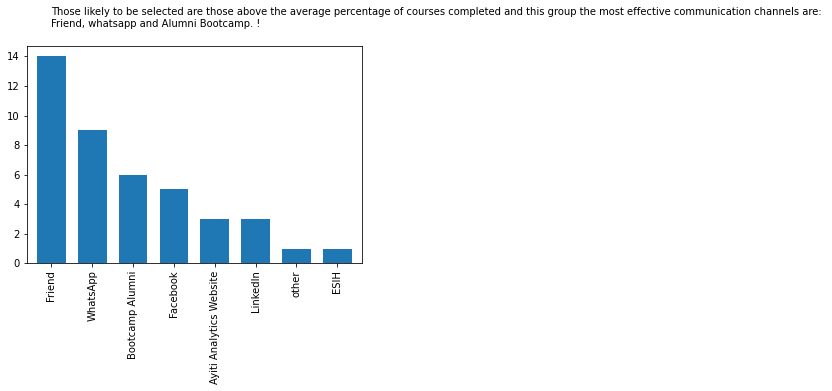

In [40]:
quest_enroll_up_mean['hear_AA_1'].value_counts().plot.bar(width= 0.7)
plt.text(0,16,'Those likely to be selected are those above the average percentage of courses completed \
and this group the most effective communication channels are: \nFriend, whatsapp and Alumni Bootcamp. !')

### 3 What is the average number of university students who should participate in this program?

In [45]:
university_students = quest_commune_enroll.loc[(quest_commune_enroll['education_level'] =='Bachelors (bacc +4)' ) |  (quest_commune_enroll['education_level']=='Masters') | (quest_commune_enroll['education_level'] =='Doctorate (PhD, MD, JD)') ]
university_students.shape

(163, 27)

In [58]:
mean_of_university_students = round(university_students.shape[0]/ quest_enroll.shape[0],2)
mean_of_university_students

0.65

In [47]:
number_of_participants = 30
average_university_students = mean_of_university_students * number_of_participants
print('The average number of university students who should participate in this program is : ',average_university_students)


The average number of university students who should participate in this program is :  19.5


### 4 What will be the average number of applications per week that we could have ?

### * 5 How many weeks should we extend the application process to select 60 students per commune ?


In [48]:
p=250 #ACtual quantity of applicants
w=5 #Actual number week
q=p/w #Actual average applicants by week
print("Actual average applicants by week :", int(q))


#Total future selected
r=60 #selected students by commune
s=3 #number commune
t=r*s #Total future selected
print("Total future selected :", t, "applicants")

#Total future applicants
u=20 #Actual applicant number
v=(p*t)/u #Total future applicants
print("Total future applicants :", int(v), "applicants")

#If we have the average application by week, found the extend delay
x=v/q #Total future week
#we considere we maintain the actuel 5 weeks inscriptions.
y=x-w #Extend delay

print("If we want to have 60 select students per commune, \nand if we have the same average applicaion by week, \n\
the extend delay found will be : ", int(y), "weeks")

Actual average applicants by week : 50
Total future selected : 180 applicants
Total future applicants : 2250 applicants
If we want to have 60 select students per commune, 
and if we have the same average applicaion by week, 
the extend delay found will be :  40 weeks


### * 7 If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time ?

In [59]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='gray',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [60]:
def prob_category(data,top_n=5,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,5)):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

In [ ]:
transaction['Payment Method'] = 'Moncash'
ord['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = order.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enroll_a=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )


enroll_b= enroll_a.loc[:,['Payment Method','user_id','quest_id']]
moy_enroll=enroll_a['percentage_completed'].value_counts(ascending=True).mean()
moy_enroll
moy_enroll= moy_enroll/10
enrol_l=enroll_a[enroll_a['percentage_completed'] > moy_enroll]
enrol_l['percentage_completed'].to_frame

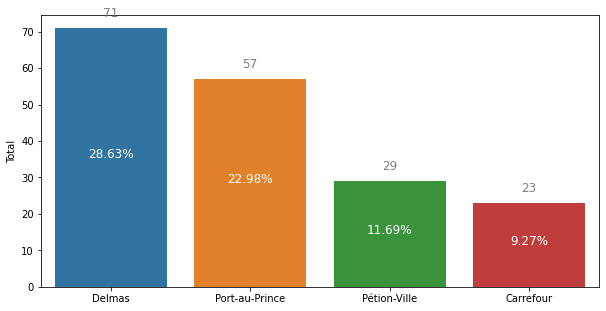

,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Pétion-Ville,29,0.116935
Carrefour,23,0.092742


In [87]:
prob_category(data=quest_commune_enroll,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

### 7 What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection ?

In [62]:
effective_channel = quest_enroll_up_mean.loc[quest_enroll_up_mean['gender'] == 'female', : ]
effective_channel.head()

,Unnamed: 0_x,gender,commune,created_at_x,modified_at,department,education_level,university,study_domain,have_computer_home,...,quest_id,Unnamed: 0_y,created_at_y,expiry_date,course_id,percentage_completed,is_free_trial,started_at,activated_at,updated_at
6,6,female,HT0111,2021-02-16T20:06:17.885833Z,2021-02-16T20:06:17.885862Z,HT01,Masters,Ecole Supérieure d'Infotronique d'Haïti (ESIH),['item1'],Yes,...,905ec1ec-ce95-11eb-8136-7c67a234f601,24.0,2021-02-16T20:16:35.911Z,NaN,1047613.0,0.452381,False,2021-02-16T20:16:36.279Z,2021-02-22T19:16:40.434Z,2021-03-03T21:50:17.810Z
7,7,female,HT0111,2021-02-16T22:54:19.490806Z,2021-02-16T22:54:19.490841Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),['item1'],Yes,...,905ec1ed-ce95-11eb-829c-7c67a234f601,94.0,2021-02-24T16:53:16.967Z,2071-02-12T16:54:21.000Z,1047613.0,0.488372,False,2021-02-24T16:55:14.134Z,2021-02-24T16:53:16.000Z,2021-03-10T10:24:48.284Z
16,16,female,HT0111,2021-02-17T15:07:25.936848Z,2021-02-17T15:07:25.936904Z,HT01,Other,unknown,['item3'],Yes,...,905f5dc1-ce95-11eb-bfa7-7c67a234f601,37.0,2021-02-17T15:14:40.939Z,NaN,1047613.0,0.833333,False,2021-02-17T15:14:43.462Z,2021-02-18T14:45:07.536Z,2021-03-03T21:50:18.489Z
31,31,female,HT0111,2021-02-22T21:47:38.898198Z,2021-02-22T21:47:38.898251Z,HT01,Other,unknown,['other'],Yes,...,90609554-ce95-11eb-a24a-7c67a234f601,108.0,2021-03-02T02:49:24.538Z,2071-02-18T02:49:29.000Z,1047613.0,0.604651,False,2021-03-02T02:50:55.145Z,2021-03-02T02:49:24.000Z,2021-03-13T00:19:13.042Z
33,33,female,HT0111,2021-02-23T15:19:56.513813Z,2021-02-23T15:19:56.513868Z,HT01,Bachelors (bacc +4),other,['other'],Yes,...,9060c2e6-ce95-11eb-b8b8-7c67a234f601,88.0,2021-02-23T20:50:47.228Z,2071-02-11T20:51:04.000Z,1047613.0,0.674419,False,2021-02-23T20:52:08.489Z,2021-02-23T20:50:47.000Z,2021-03-13T12:56:02.636Z


In [63]:
effective_channel['hear_AA_1'].value_counts()

Bootcamp Alumni    3
WhatsApp           3
Friend             2
Facebook           2
other              1
LinkedIn           1
Name: hear_AA_1, dtype: int64

Text(0, 3.5, 'The most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection are : Whatsapp, Bootcamp Alumni, Friend')

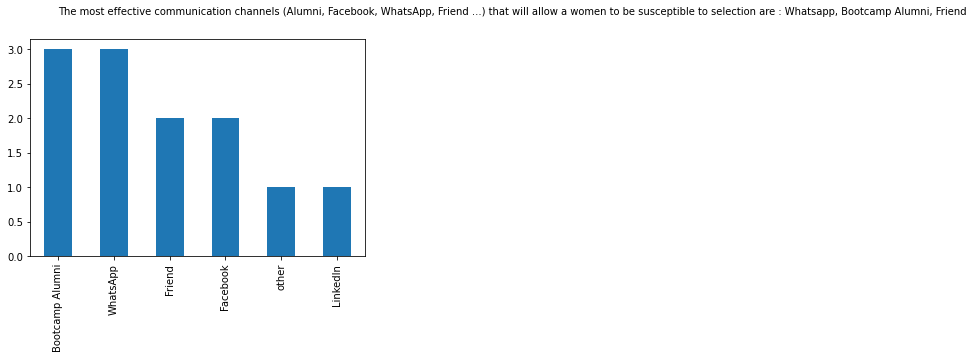

In [64]:
effective_channel['hear_AA_1'].value_counts().plot.bar()
plt.text(0,3.5,'The most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection are : Whatsapp, Bootcamp Alumni, Friend')